In [25]:
from pathlib import Path
import IPython
import json
import seaborn as sns

In [26]:
PROJECT_ROOT = Path(globals()['_dh'][0]).parent.parent

In [27]:
benchmark_arch_directories = list((PROJECT_ROOT / ".benchmarks").iterdir())
if len(benchmark_arch_directories) != 1:
    raise Exception(f"Expected exactly one benchmark architecture directory, found {len(benchmark_arch_directories)}")
benchmark_arch_directory = benchmark_arch_directories[0]
benchmark_result_paths = sorted(path for path in benchmark_arch_directory.iterdir() if path.name.endswith(".json"))
latest_benchmark_result_path = benchmark_result_paths[-1]

In [33]:
benchmarks_sorted_by_execution_time = sorted(
    json.loads(latest_benchmark_result_path.read_text())["benchmarks"],
    key=lambda benchmark: benchmark["stats"]["mean"],
)
stats_by_framework = {
    benchmark["extra_info"]["library_name"]: benchmark["stats"]
    for benchmark in benchmarks_sorted_by_execution_time
}
rounds = next(iter(stats_by_framework.values()))["rounds"]
for framework, stats in stats_by_framework.items():
    if stats["rounds"] != rounds:
        raise Exception(f"Expected all frameworks to have {rounds} rounds, but {framework} has {stats['rounds']}")

Exception: Expected all frameworks to have 11 rounds, but Polars has 13

In [29]:
print(f"Latest benchmark result:", stats_by_framework)


Latest benchmark result: {'PyArrow': {'min': 0.06118400000559632, 'max': 0.06798241700744256, 'mean': 0.06316217427427712, 'stddev': 0.0018699073483067592, 'rounds': 11, 'median': 0.06258600000001024, 'iqr': 0.0008450935092696454, 'q1': 0.062328083244210575, 'q3': 0.06317317675348022, 'iqr_outliers': 2, 'stddev_outliers': 3, 'outliers': '3;2', 'ld15iqr': 0.06118400000559632, 'hd15iqr': 0.06507579199387692, 'ops': 15.832260549764694, 'total': 0.6947839170170482, 'iterations': 1}, 'Polars': {'min': 0.06252316600875929, 'max': 0.07416887499857694, 'mean': 0.06738986207906586, 'stddev': 0.0029829255892640533, 'rounds': 13, 'median': 0.06689762500172947, 'iqr': 0.003914458258805098, 'q1': 0.06528653099667281, 'q3': 0.06920098925547791, 'iqr_outliers': 0, 'stddev_outliers': 2, 'outliers': '2;0', 'ld15iqr': 0.06252316600875929, 'hd15iqr': 0.07416887499857694, 'ops': 14.83902725348717, 'total': 0.8760682070278563, 'iterations': 1}, 'DuckDB': {'min': 0.14645237500371877, 'max': 0.15808966600161

Text(0.5, 0, 'Framework')

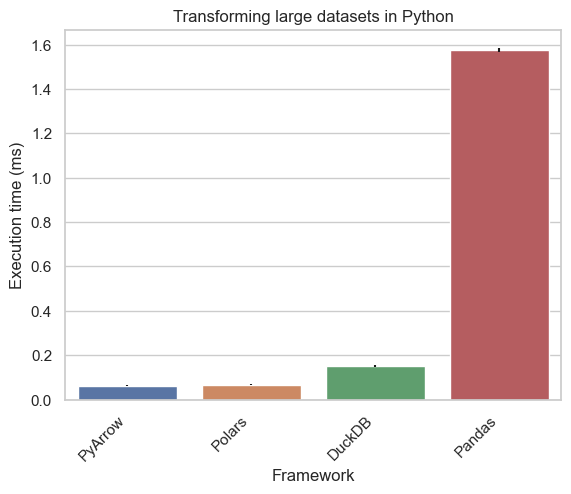

In [30]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    x=list(stats_by_framework.keys()),
    y=[stats["mean"] for stats in stats_by_framework.values()],
    yerr=[stats["stddev"] for stats in stats_by_framework.values()],
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Transforming large datasets in Python")
ax.set_ylabel("Execution time (ms)")
ax.set_xlabel("Framework")